In [49]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [50]:
import numpy as np
import pandas as pd

In [51]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [52]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [53]:
engine = create_engine("sqlite:///..//Resources/hawaii.sqlite")

In [54]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [55]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [56]:
#  use inspector to get column names/types for measurement table
inspector = inspect(engine)

mcolumns = inspector.get_columns('measurement')
for c in mcolumns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [57]:
# use inspector to get column names/types for station table
scolumns = inspector.get_columns('station')
for c in scolumns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [58]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# get the max date in dataset 
MaxDate = engine.execute('SELECT max(date) FROM measurement order by date desc limit 1').fetchall()
for maxdate in MaxDate:
    print (f'MaxDate: {maxdate}')

# lastest date
maxDBDT = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print (f'maxDBDT: {maxDBDT}')

MaxDate: ('2017-08-23',)
maxDBDT: ('2017-08-23',)


In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today
todayDT = dt.date.today()
print(f'Today: {todayDT}')

####   DIRECTION YIELDS NO RESULT.  MAX(date) in database is 2017-08-23, see section above
####   Change to use MAX(date) - 1 year

lastDBDT = dt.datetime(2017, 8,23)
print (f'lastDBDT: {lastDBDT}')

#yearAgoDT = dt.datetime(todayDT - dt.timedelta(days=365))
yearAgoDT = lastDBDT- dt.timedelta(days=365)
print (f'A year ago: {yearAgoDT}')


# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,Measurement.prcp ]

lastYearPrec = session.query(*sel).filter(Measurement.date >= yearAgoDT).\
               filter(Measurement.date <= lastDBDT).order_by(Measurement.date).all()

#lastYearPrec = session.query(*sel).filter(Measurement.date >= yearAgoDT).\
#               filter(Measurement.date <= lastDBDT).order_by(Measurement.date).limit(100).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(lastYearPrec, columns=['date', 'prcp'])
df.head()

# Sort the dataframe by date
df.set_index('date', inplace=True)
df.sort_values('date')


# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
#df.plot(rot=45)

#plt.xticks([])
#plt.xlabel("Date")

#plt.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False) # labels along the bottom edge are off

#plt.tight_layout()
#plt.show()



Today: 2018-09-05
lastDBDT: 2017-08-23 00:00:00
A year ago: 2016-08-23 00:00:00


,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


In [62]:
# What are the most active stations?
# List the stations and the counts in descending order.
#stationCounts =  session.query(Measurement).group_by(Measurement.station).all()
stationCounts = engine.execute('SELECT station, count(*) AS station_cnt FROM measurement group by station order by count(*) desc').fetchall()

print (stationCounts)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [63]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

activesel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

activeStationStat = session.query(*activesel).filter(Measurement.station == "USC00519281").all()
activeStationStat

[(54.0, 85.0, 71.66378066378067)]

In [64]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tempsel = [Measurement.date, Measurement.tobs ]

lastYearPrec = session.query(*tempsel).filter(Measurement.date >= yearAgoDT).\
               filter(Measurement.station == "USC00519281").\
               filter(Measurement.date <= lastDBDT).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
#df = pd.DataFrame(may_averages, columns=['stock', 'open_avg', 'high_avg', 'low_avg', 'close_avg'])
activeTobs_df = pd.DataFrame(lastYearPrec, columns=['date', 'tobs'])
activeTobs_df.head()


,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


In [65]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    tobstats = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
      
    return tobstats

print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [66]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

start_date = '2017-06-25'
end_date = '2017-07-05'

tripAvgTemp = calc_temps(start_date, end_date)
print (tripAvgTemp)
type(tripAvgTemp)


[(71.0, 77.9076923076923, 87.0)]


list

In [67]:
#activeTobs_df = pd.DataFrame(lastYearPrec, columns=['date', 'tobs'])

#tripAvgTemp_df = pd.DataFrame(np.array(tripAvgTemp).reshape(1,3), columns = list("abc"))
tripTemp_df = pd.DataFrame(np.array(tripAvgTemp).reshape(1,3), columns = ["min", "avg", "max"])
tripTemp_df

tripAvgTemp_df = tripTemp_df.iloc[:,1]
tripAvgTemp_df

ptp = tripTemp_df.iloc[0,2] - tripTemp_df.iloc[0,0]
print (ptp)

16.0


<IPython.core.display.Javascript object>


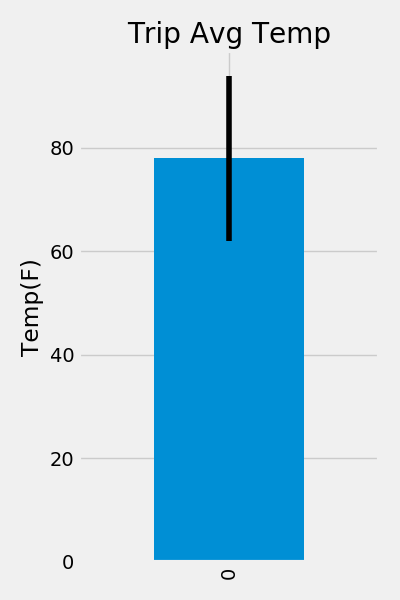

In [68]:
#tripTemp_df.plot(kind='bar')
#plt.show()

tripAvgTemp_df.plot(kind="bar", yerr = ptp, title = "Trip Avg Temp", figsize=(4, 6))
plt.ylabel("Temp(F)")
plt.tight_layout()
plt.savefig('../plots/AvgTemp.png',dpi=200)

plt.show()

In [69]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainSel = [Measurement.station, 
           Station.name, 
           Station.latitude, 
           Station.longitude, 
           Station.elevation, 
           func.sum(Measurement.prcp)]


prcptats = session.query(*rainSel).\
                         filter(Measurement.station == Station.station).\
                         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
                         group_by(Station.station).\
                         order_by(func.sum(Measurement.prcp).desc()).all()
             
prcptats    


[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  1.88),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.5599999999999999),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  0.45000000000000007),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.2),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.12),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.09000000000000001),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.0)]